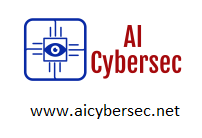

#                    Introduction to SQL connecting to Databases
                              Author : Dr Amin. Mehab

## Learning Objectives

### Core

- Connect to a local or remote database using the command line, Python, or `pandas`
- Connect to a local database using SQLite
- Perform queries using SELECT
- Perform simple aggregations using COUNT and MAX/MIN/SUM


### Target

- Creating Tables and Adding Columns
    - Adding Data
    - Updating Records
    - Removing Records
- Connect to an SQLite database with the SQLite browser interface


### Lesson Guide
- [Connecting to a Local Database](#connecting-to-localdb)
    - [SQLite](#sqlite)
    - [Interacting with SQLite](#interacting-sqlite)
    - [Common SQL Command Patterns](#command-patterns)
    - [SQLite Command Line Utility](#sqlite-command-line)
    - [Creating Tables and Adding Columns](#sqlite-tables-columns)
    - [Adding Data](#adding-data)
    - [Updating Records](#updating-records)
    - [Removing Records](#removing-records)
- [Comparison of SQL Commands](#comparison-commands)
- [Interacting with SQLite from Python](#python-sqlite)
    - [The SQLite3 Package](#sqlite3)
    - [SQLite3: Adding Data](#sqlite3-adding)
    - [Adding Data From a `.csv` File](#adding-csv)
- [`pandas` Connector](#pandas-connector)
    - [Writing Data Into a Database](#pandas-writing)
    - [Reading Data From a Database](#pandas-reading)
- [SQL Syntax](#sql-syntax)
    - [Aggregations](#aggregations)
- [Independent Practice: Querying a Database](#ind-practice)
- [Connecting to a Remote Database](#remote-database)
    - [PostgreSQL](#postgresql)
- [Additional Resources](#resources)

<a name="connecting-to-localdb"></a>
## Connecting to a Local Database

---

A database can be local or remote; it can span a single machine or be distributed with replicated data over several. The latter configuration is called _sharding_.

Let's start by connecting to a local _SQLite_ database.

<a id='sqlite'></a>

### SQLite

**[SQLite](https://sqlite.org/)** is a database software package built on the Structured Query Language [(SQL)](http://www.tutorialspoint.com/sql/). It is similar to other SQL databases, such as [PostgreSQL](http://www.postgresql.org/), [MySQL](https://www.mysql.com/), Oracle, and Microsoft SQL Server, except it is *file-based* rather than *server-based*. This makes it easy to set up and use for small projects but less suitable for production environments. Once you are familiar with SQLite, the same ideas and similar syntax can be applied to other SQL databases.

Version 3 of SQLite is bundled with most Python distributions (including our Anaconda distribution). 

<a id='interacting-sqlite'></a>

### Interacting with SQLite

There are multiple ways of interacting with an SQLite database, including:

1. SQLite command line utility
2. Python's `sqlite3` package
3. `pandas`' SQL Interface
4. High-level ORMs (object relational mappings) (e.g., SQLAlchemy, Django ORM, etc.)

Let's start with the first method. All of these methods provide some form of wrapper, or set of convenience functions, for interacting with SQLite. Behind the scenes, the Structured Query Language (SQL) itself defines the interface to the database software. This underlying SQL syntax will be visible to a greater or lesser degree, depending on the method chosen.

<a id='command-patterns'></a>

### Common SQL Command Patterns

The SQL command set has a rich syntax with numerous options, but most of the commonly used commands follow a few simple patterns. A basic familiarity of these patterns is helpful when working in SQL:

```SQL    
CREATE TABLE ...
ALTER TABLE ... ADD COLUMN ...
INSERT INTO ... VALUES ...
UPDATE ... SET ... WHERE ...
SELECT ... FROM ... WHERE ...
SELECT ... FROM ... JOIN ... ON ...
DELETE FROM ... WHERE ...
```

<a id='sqlite-command-line'></a>

### SQLite Command Line Utility

The first method we'll explore is connecting to SQLite via the built-in [command line utility](https://www.sqlite.org/sqlite.html).  

> Note: The commands in this section should be executed within your normal terminal shell.

To start a new session of the interpreter, simply open your terminal and type `sqlite3`, followed by the name of the database file. If the file does not yet exist, SQLite will create it.

```bash
$ sqlite3 test1.sqlite

SQLite version 3.13.0 2016-05-18 10:57:30
Enter ".help" for usage hints.
sqlite>
```
    
Notice that your terminal prompt changes to `sqlite>`, indicating that you are now entering commands into the SQLite command line utility. Take a quick look at the `help` command:

```bash
sqlite> .help
```

Display the current databases — you should see the new file `test1.db`:

    sqlite> .databases
    
In order to execute an SQL statement, you will need to use the semicolon syntax (';') to designate the end of a statement. The statement below used to appear when initiating older versions of SQLite3 in terminal.
    
    "Enter SQL statements terminated with a ';'."
 

<a id='sqlite-tables-columns'></a>

### Creating Tables and Adding Columns

Create a table called `table1` with a single column, `field1`, containing an INTEGER PRIMARY KEY.

```SQL
CREATE TABLE table1 (field1 INTEGER PRIMARY KEY);
```

Add a few more columns to `table1`.

```SQL
ALTER TABLE table1 ADD COLUMN field2 VARCHAR(16);
ALTER TABLE table1 ADD COLUMN field3 REAL;
ALTER TABLE table1 ADD COLUMN field4 TEXT;
```

Notice the different field types in the ALTER TABLE commands. SQLite supports several different [field types](https://www.sqlite.org/datatype3.html), including INTEGERS, variable length character fields, or VARCHAR (with a max length), TEXT fields, and 'REALS,' which are used to store floating point numbers.

Next, verify that the table was created.

    sqlite> .tables

You can check the schema of the table using `.schema`, which shows the commands that would be necessary to create the database tables from scratch.  

    sqlite> .schema

Notice that, in this case, our `table1` could have been created with a single command rather than by adding each column individually.

<a id='adding-data'></a>

### Adding data

Let's add some data:

```SQL
INSERT INTO table1 VALUES (1, 'Henry James', 42, '75 Mission Street, San Francisco, CA');
INSERT INTO table1 VALUES (2, 'Carol James', 40, '75 Mission Street, San Francisco, CA');
INSERT INTO table1 VALUES (3, 'Jesse James', 12, '75 Mission Street, San Francisco, CA');
```

Notice that the first column has unique values — this is a requirement for the PRIMARY KEY (PK) column. If we try to add a record using an existing PK value, we'll get an error.

```SQL
INSERT INTO table1 VALUES (3, 'Julie James', 10, '75 Mission Street, San Francisco, CA');
```

    Error: UNIQUE constraint failed: table1.field1

Fortunately, SQLite has some built-in functionality to auto-increment the PK value — just set the value of the PK field to NULL while running the INSERT command, and it will automatically be set to a valid value.

```SQL
INSERT INTO table1 VALUES (NULL, 'Julie James', 10, '75 Mission Street, San Francisco, CA');
```

Notice that the value in `field1` for the "Julie James" record has been automatically set to 4.

To check the content of the table, use

```SQL
SELECT * FROM table1;
```



<a id='updating-records'></a>

### Updating Records

Suppose we need to update an existing record with new data — e.g., maybe Julie James is 9. For this, we use the UPDATE command.

```SQL
UPDATE table1 SET field3=9 WHERE field1=4;
```

<a id='removing-records'></a>
### Removing Records

To remove records, use the DELETE command.

```SQL
DELETE FROM table1 WHERE field2 like '%Jesse%';
```

**Verify that the "Jesse James" record has been removed.** 

### Exiting the SQLite command line

To exit the SQLite interpreter, type `.exit`.

```SQL
.exit
```

<a name="python-sqlite"></a>
## Interacting with SQLite from Python

---

<a id='sqlite3'></a>
### The SQLite3 Package

The command line utility can be useful for basic SQL tasks, but, because we're using Python, it is often easier to access SQLite directly through Python code. We can use the Python [SQLite3](https://docs.python.org/2.7/library/sqlite3.html) package for just this purpose.

**Below, we open a connection to an SQLite database file using Python. Like before, if the file does not already exist, it will be created automatically.**

In [3]:
import sqlite3
sqlite_db = '../Exercises/test_db.sqlite'
conn = sqlite3.connect(sqlite_db)
c = conn.cursor()

_Note: The `.cursor()` method is necessary because, in many DB structures, a cursor is needed to iterate over the rows of data. The cursor also functions as a means of fetching information when using SQLite3. _

**The syntax to create a table is similar to the console, only now we use the `.execute()` method of the cursor object (`c`) we just created:**

In [4]:
# If table already exists:
c.execute('DROP TABLE houses')
conn.commit()

OperationalError: no such table: houses

In [5]:
c.execute('CREATE TABLE houses (field1 INTEGER PRIMARY KEY, sqft INTEGER, bdrms INTEGER, age INTEGER, price INTEGER);')

# Save (commit) the changes.
conn.commit()

With the database saved, the table should now be viewable among the existing tables.

<a id='sqlite3-adding'></a>

### SQLite3: Adding Data

Because we're back in Python, we can now use regular programming techniques in conjunction with the SQLite connection.  In particular, the cursor's `.execute()` method supports value substitution using the `?` character, which makes adding multiple records a bit easier.

See the [docs](https://docs.python.org/2.7/library/sqlite3.html) for more details.

In [6]:
last_sale = (None, 4000, 5, 22, 619000)
c.execute('INSERT INTO houses VALUES (?,?,?,?,?)', last_sale)

# Remember to commit the changes.
conn.commit()

Notice that, in this syntax, we use Python's `None` value, rather than `NULL`, to trigger SQLite and auto-increment the Primary Key. 

There is a related cursor method, `.executemany()`, which takes an array of tuples and loops through them, substituting one tuple at a time.

```python
recent_sales = [
  (None, 2390, 4, 34, 319000),
  (None, 1870, 3, 14, 289000),
  (None, 1505, 3, 90, 269000),
]
```

```python
c.executemany('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', recent_sales)
```

```
conn.commit()
```
<a id='adding-csv'></a>

### Adding Data From a `.csv` File

Next, let's load our `housing.csv` data into an array and then `INSERT` those records into the database. In this example, we'll use the `numpy` `.genfromtxt()` function to read the file and parse its contents. 

In [8]:
from numpy import genfromtxt

# import into nparray of ints, then convert to list of lists
data = (genfromtxt('housing-data.csv', dtype='i8',
                   delimiter=',', skip_header=1)).tolist()

# append a None value to beginning of each sub-list
for d in data:
    d.insert(0, None)

In [9]:
data[0:3]

[[None, 2104, 3, 70, 399900],
 [None, 1600, 3, 28, 329900],
 [None, 2400, 3, 44, 369000]]

In [10]:
# Loop through data, running an INSERT on each record (i.e., sublist).
for d in data:
    c.execute('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', d)

conn.commit()

> **Remember:** All elements in a `numpy` array must be the same data type, so, if we want to "add a `None`" to each row, we would need to work around this. Lists can contain mixed types, so this is one approach.

Still, in this case, the value we're adding is the same for all records, so we can simply use a `None` in the INSERT statement.

**How do you delete data?**

In [11]:
# Similar syntax as before.
results = c.execute("SELECT * FROM houses")

# Here, results is a cursor object — use `.fetchall()` to extract a list.

In [12]:
results

In [13]:
(results.fetchall())

[(1, 4000, 5, 22, 619000),
 (2, 2104, 3, 70, 399900),
 (3, 1600, 3, 28, 329900),
 (4, 2400, 3, 44, 369000),
 (5, 1416, 2, 49, 232000),
 (6, 3000, 4, 75, 539900),
 (7, 1985, 4, 61, 299900),
 (8, 1534, 3, 12, 314900),
 (9, 1427, 3, 57, 198999),
 (10, 1380, 3, 14, 212000),
 (11, 1494, 3, 15, 242500),
 (12, 1940, 4, 7, 239999),
 (13, 2000, 3, 27, 347000),
 (14, 1890, 3, 45, 329999),
 (15, 4478, 5, 49, 699900),
 (16, 1268, 3, 58, 259900),
 (17, 2300, 4, 77, 449900),
 (18, 1320, 2, 62, 299900),
 (19, 1236, 3, 78, 199900),
 (20, 2609, 4, 5, 499998),
 (21, 3031, 4, 21, 599000),
 (22, 1767, 3, 44, 252900),
 (23, 1888, 2, 79, 255000),
 (24, 1604, 3, 13, 242900),
 (25, 1962, 4, 53, 259900),
 (26, 3890, 3, 36, 573900),
 (27, 1100, 3, 60, 249900),
 (28, 1458, 3, 29, 464500),
 (29, 2526, 3, 13, 469000),
 (30, 2200, 3, 28, 475000),
 (31, 2637, 3, 25, 299900),
 (32, 1839, 2, 40, 349900),
 (33, 1000, 1, 5, 169900),
 (34, 2040, 4, 75, 314900),
 (35, 3137, 3, 67, 579900),
 (36, 1811, 4, 24, 285900),
 (37

In [14]:
# Similar syntax as before.
results = c.execute("SELECT * FROM houses WHERE bdrms = 4")

# Here, results is a cursor object — use `.fetchall()` to extract a list.
r = results.fetchall()

In [15]:
r

[(6, 3000, 4, 75, 539900),
 (7, 1985, 4, 61, 299900),
 (12, 1940, 4, 7, 239999),
 (17, 2300, 4, 77, 449900),
 (20, 2609, 4, 5, 499998),
 (21, 3031, 4, 21, 599000),
 (25, 1962, 4, 53, 259900),
 (34, 2040, 4, 75, 314900),
 (36, 1811, 4, 24, 285900),
 (39, 2132, 4, 28, 345000),
 (40, 4215, 4, 66, 549000),
 (41, 2162, 4, 43, 287000),
 (44, 2567, 4, 57, 314000),
 (47, 1852, 4, 64, 299900)]

In [16]:
results.fetchall()

[]

In [17]:
len([d for d in data if d[3] > 50])

18

In [18]:
# Similar syntax as before.
results = c.execute("Delete FROM houses where age>50")

In [19]:
results = c.execute("SELECT * FROM houses")

len(results.fetchall())

30

In [20]:
conn.commit()

<a id='pandas-connector'></a>

## `pandas` Connector

---

While databases provide many analytical capabilities, it's often useful to pull data back into Python for more flexible programming. Large, fixed operations would be more efficient in a database, but `pandas` allows for interactive processing.

For example, imagine you want to aggregate nightly logins or sales to present a report or dashboard. Most likely, you wouldn't be changing or operating on a large data set. You could perform this aggregation efficiently within a database.

However, if we want to investigate login or sales data further and ask more interactive questions, using Python would be more practical.

In [21]:
import pandas as pd

`Pandas` can connect to most relational databases. In this demonstration, we'll create and connect to an SQLite database.

SQLite creates portable SQL databases saved in a single file. These databases are stored efficiently and allow for  fast querying, making them ideal for small databases or ones that need to be moved across machines.

<a id='pandas-writing'></a>

### Writing Data Into a Database

Data in `pandas` can be loaded into a relational database. For the most part, `pandas` can use column information to infer the schema for the table it creates. In the next demo, we will use the housing data set.

In [22]:
# Low_memory = Gets rid of ambigious warning... nothing to see here
data = pd.read_csv('housing-data.csv', low_memory=False)
data.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


Data is moved to the database through the `to_sql` command, similar to the `to_csv` command.

`to_sql` takes the following arguments:
- `name`, the table name to create.
- `con`, a connection to a database.
- `index`, whether or not to input the index column.
- `schema`, if we want to write a custom schema for the new table.
- `if_exists`, what to do if the table already exists. We can overwrite it, add to it, or fail.
    
> ### BTW, what was with the `conn` object?  
> We defined it in a previous example:
> ```python
import sqlite3
sqlite_db = './datasets/test_db.sqlite'
conn = sqlite3.connect(sqlite_db) 
c = conn.cursor()
```

In [20]:
data.to_sql('houses_pandas',             # Name of the table.
            # The handle to the file that is set up.
            con=conn,
            if_exists='replace',         # Overwrite, append, or fail.
            index=False)                 # Add index as column.

<a id='pandas-reading'></a>

### Reading Data from a Database
_Result as a DataFrame_

If we already have data in our database, we can use `pandas` to query it. Querying is done through the `read_sql` command in the `sql` module.

In [21]:
df = pd.read_sql('SELECT * FROM houses_pandas LIMIT 10', con=conn)
df

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900
5,1985,4,61,299900
6,1534,3,12,314900
7,1427,3,57,198999
8,1380,3,14,212000
9,1494,3,15,242500


<a name="sql-syntax"></a>

## SQL Syntax

---

### SQL Operators

> Note: Each of the following can be demonstrated in `pandas` using the data we've set up above. A demo and check are included for each, but we can try out a few before we begin.

#### SELECT

Every query should start with `SELECT`. `SELECT` is followed by the names of the columns in the output.

`SELECT` is always paired with `FROM`, which identifies the table from which we're retrieving the data.

```SQL
SELECT
<columns>
FROM
<table>
```

`SELECT *` returns *all* of the columns.

Housing data example:
```SQL
SELECT
*
FROM houses_pandas;
```

**Check:** What do `sqft`, `bdrms`, and `price` refer to? What will they return?

```SQL
SELECT
sqft, bdrms, price
FROM houses_pandas;
```

#### WHERE

`WHERE`, which follows the `FROM` clause, is used to filter tables using specific criteria.

```SQL
SELECT
<columns>
FROM
<table>
WHERE
<condition>
```
Example:
```SQL
SELECT
sqft, bdrms, age, price
FROM houses_pandas
WHERE bdrms = 2 and price < 250000;
```

The condition is a filter that's applied to the rows. The rows that match the condition will be included in the output.

#### Check: 

Write a query that returns the `sqft`, `bdrms`, and `age` for houses older than 60.

In [22]:
sql_query = """
SELECT sqft, bdrms, age
FROM houses_pandas
WHERE age > 60
LIMIT 10
"""  # multiline query

df = pd.read_sql(sql_query, con=conn)
df

,sqft,bdrms,age
0,2104,3,70
1,3000,4,75
2,1985,4,61
3,2300,4,77
4,1320,2,62
5,1236,3,78
6,1888,2,79
7,2040,4,75
8,3137,3,67
9,4215,4,66


### Aggregations
<a name="aggregations"></a>

Aggregations (or aggregate functions) are functions in which the values of multiple rows are grouped together as an input on certain criteria to form a single value of more significant meaning or measurement. Examples are sets, bags, or lists.

Aggregate functions include:

- Average (i.e., arithmetic mean)
- Count
- Maximum
- Minimum
- Median
- Mode
- Sum

In SQL, they are performed in a `SELECT` statement like the following:

```SQL
SELECT COUNT(price)
FROM houses_pandas;
```

```SQL
SELECT AVG(sqft), MIN(price), MAX(price)
FROM houses_pandas
WHERE bdrms = 2;
```

In [23]:
sql_query = 'SELECT COUNT(*) FROM houses_pandas;'
pd.read_sql(sql_query, con=conn)

,COUNT(*)
0,47


In [24]:
sql_query = ('SELECT AVG(sqft), MIN(price), MAX(price) '
             'FROM houses_pandas '
             'WHERE bdrms = 2')


# We can combine SQL queries with `pandas` functions for aggregate info, too.
pd.read_sql(sql_query, con=conn)

,AVG(sqft),MIN(price),MAX(price)
0,1496.5,179900,368500


In [25]:
sql_query = "SELECT * FROM houses_pandas WHERE bdrms=2"  # Single-line query

# We can combine SQL queries with `pandas` functions for aggregate info, too.
pd.read_sql(sql_query, con=conn).describe().T

,count,mean,std,min,25%,50%,75%,max
sqft,6.0,1496.500000,387.723484,852.0,1344.00,1540.0,1795.25,1888.0
bdrms,6.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0
age,6.0,56.666667,16.243973,40.0,42.25,55.5,68.00,79.0
price,6.0,280866.666667,72192.483450,179900.0,237750.00,277450.0,337400.00,368500.0


### Group by

We can aggregate only within groups using the `GROUP BY` argument. 

Any `WHERE` statements have to come before `GROUP BY` statements.

In [26]:
sql_query = ('SELECT bdrms, AVG(sqft), MIN(price), MAX(price) '
             'FROM houses_pandas '
             'where age<50 '
             'GROUP BY bdrms')


# We can combine SQL queries with `pandas` functions for aggregate info, too.
pd.read_sql(sql_query, con=conn, index_col='bdrms')

,AVG(sqft),MIN(price),MAX(price)
bdrms,,,
1,1000.000000,169900,169900
2,1639.666667,232000,368500
3,1944.705882,212000,573900
4,2280.833333,239999,599000
5,4478.000000,699900,699900


That is equivalent to selecting first and then using the pandas group by.

In [27]:
sql_query = ('SELECT bdrms, sqft, price '
             'FROM houses_pandas '
             'WHERE age < 50')


# We can combine SQL queries with `pandas` functions for aggregate info, too.
groups = pd.read_sql(sql_query, con=conn).groupby('bdrms')

In [28]:
groups.sqft.mean()

bdrms
1    1000.000000
2    1639.666667
3    1944.705882
4    2280.833333
5    4478.000000
Name: sqft, dtype: float64

In [29]:
groups.price.min()

bdrms
1    169900
2    232000
3    212000
4    239999
5    699900
Name: price, dtype: int64

In [30]:
groups.price.max()

bdrms
1    169900
2    368500
3    573900
4    599000
5    699900
Name: price, dtype: int64

<a name="ind-practice"></a>

## Independent Practice: Querying a Database

---

Practice querying the SQLite database we've created using any of the methods you've learned so far:

- Console connection
- Python's `sqlite3` package
- `pandas`

### What is the average price per room for two-bedroom apartments?

In [31]:
sql_query = """
SELECT AVG(price)/2 FROM houses_pandas
WHERE bdrms = 2
"""

pd.read_sql(sql_query, con=conn)

,AVG(price)/2
0,140433.333333


### How old is the oldest three-bedroom apartment?

In [32]:
sql_query = """
SELECT MAX(age) FROM houses_pandas
WHERE bdrms = 3
"""

pd.read_sql(sql_query, con=conn)

,MAX(age)
0,78


### How old is the youngest apartment?

In [33]:
sql_query = """
SELECT MIN(age) FROM houses_pandas
"""

pd.read_sql(sql_query, con=conn)

,MIN(age)
0,5


### What is the average age for the whole data set?

In [34]:
sql_query = """
SELECT AVG(age) FROM houses_pandas
"""

pd.read_sql(sql_query, con=conn)

,AVG(age)
0,42.744681


### What is the average age for each bedroom size?
_Tip: This will most likely require `pandas`/SQL integration._

In [35]:
sql_query = """
SELECT bdrms, AVG(age) FROM houses_pandas
GROUP BY bdrms
"""

pd.read_sql(sql_query, con=conn, index_col='bdrms')

,AVG(age)
bdrms,
1,5.000000
2,56.666667
3,38.360000
4,46.857143
5,49.000000


In [36]:
sql_query = """
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = %d
"""

for bdrm in range(1, 6):
    print("\nAVG number of \"%d\" bdrm(s): " % bdrm,'\n',
          pd.read_sql(sql_query % bdrm, con=conn), "\n",
          sql_query % bdrm)


AVG number of "1" bdrm(s):  
    AVG(age)
0       5.0 
 
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = 1


AVG number of "2" bdrm(s):  
     AVG(age)
0  56.666667 
 
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = 2


AVG number of "3" bdrm(s):  
    AVG(age)
0     38.36 
 
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = 3


AVG number of "4" bdrm(s):  
     AVG(age)
0  46.857143 
 
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = 4


AVG number of "5" bdrm(s):  
    AVG(age)
0      49.0 
 
SELECT AVG(age) FROM houses_pandas
WHERE bdrms = 5



**If you finish, try completing the first sections of [SQL Zoo](http://www.sqlzoo.net).**

## SQLite Browser

There are two options you might want to explore for browsing SQLite3 databases:

- [SQLite Browser](http://sqlitebrowser.org/), a free, cross-platform solution.
- [SQLite Manager](https://addons.mozilla.org/en-US/firefox/addon/sqlite-manager/?src), a Firefox add-on for viewing SQLite database files via a simple GUI.


You can install SQLite Browser with

```bash
brew cask install db-browser-for-sqlite
```

If you don't have brew installed, execute first the following command:

```bash
/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
```

Now that we have some data, take a look at the database using the **SQLite Browser**.

1. Open the app.
2. Open SQLite3 file "Open Database" from the file menu. 
   - _This file will most likely be in the directory you were in when we started using `sqlite3` commands._
3. After connecting to the database, click on "Browse Data" in the tabbed UI.

You should be able to view something like below. 

![SQLite Manager](https://snag.gy/xc8W5M.jpg)

<a name="remote-database"></a>
## Connecting to a Remote Database

---


<a id='postgresql'></a>
### PostgreSQL

**[PostgreSQL](http://www.postgresql.org/)** is a powerful SQL-based relational database.

#### PostgreSQL Syntax

GA provides a PostgreSQL database instance at the following address:

You can connect to it using:

> `psql -h dsi.c20gkj5cvu3l.us-east-1.rds.amazonaws.com -p 5432 -U dsi_student titanic`  
    Password: gastudents

PosgreSQL accepts the same syntax as SQLite, with exception of a few system commands. Here are the most common:

- `\q`: Quit/exit.
- `\c __database__`: Connect to a database.
- `\d __table__`: Show table definition, including triggers.
- `\dt *.*`: List tables from all schemas (if `*.*` is omitted, this will only show SEARCH_PATH ones).
- `\l`: List databases.
- `\dn`: List schemas.
- `\df`: List functions.
- `\dv`: List views.
- `\dt`: List tables.
- `\df+ __function`: Show function SQL code.
- `\x`: Pretty-format query results instead of displaying not-so-useful ASCII tables.


Suggestions:

- Most `\d` commands support additional parameters of `__schema__.name__` and accept wildcards like `*.*`.

<a id='comparison-commands'></a>
## Comparison of SQL Commands

---


|Task|MySQL|PostgreSQL|SQLite|
|---|---|---|---|
|Connect to a database|mysql &lt;dbname&gt;| psql &lt;dbname&gt;|sqlite3 &lt;filename&gt;|
|Client help|help contents|\?|.help|
|SQL help|help contents|\h|n/a|
|List databases|SHOW DATABASES;|\l|.databases|
|Change database|USE &lt;dbname&gt;|\c <dbname&gt;|n/a|
|List tables|SHOW TABLES;|\dt|.tables|
|Show table|info DESCRIBE &lt;tablename&gt;|\d &lt;tablename&gt;|.schema &lt;tablename&gt;|
|Load data|LOAD DATA INFILE &lt;file&gt; |\i &lt;file&gt;|.import &lt;file&gt; &lt;table&gt;|
|Export data|SELECT ... INTO OUTFILE &lt;file&gt;|\o &lt;file&gt;|.dump &lt;table&gt;|
|Exit the client|quit (or exit)| \q|.exit|

<a name="intermission"></a>

## Conclusion

---

We have seen how to connect to a local SQLite database and a remote postgreSQL database.

**Check:** What SQL operations have we learned so far?

**Check:** What commands have we learned for SQLite and PostgreSQL?


<a id='resources'></a>

## Additional Resources 

---

- [SQLite3's website](http://www.sqlite.org)  
- [SQLite — Python tutorial](http://sebastianraschka.com/Articles/2014_sqlite_in_python_tutorial.html)  
- [SQL Zoo](http://www.sqlzoo.net)